
# <p style="text-align: center;"> Using Shallow Classifier Models of Machine Learning to analyze a randomly generated dataset of _fabricated_ honeybee hive observations to predict survival </p>
***
### <p style="text-align: center;"> _Goal: Find the best model to predict hive survival based on observations of reported hive data_ </p>


[Link to my github repo for the files] (https://github.com/ContoakleyK/BIOF509-Bee-Trends)

#### Please take time to review some of the other scratch notebooks in this repo which illustrate the arduous process that lead me to this result.  
Thank you for your consideration of my struggle.

[Link to my github repo for the presentation] (https://github.com/ContoakleyK/BIOF509-Bee-Trends/blob/master/Bee%20Survivability%20-%20BIOF509%20-%20Kevin%20Oakley.pdf)

In [1]:
### Import packages to pull csv file from repo for analysis
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import requests
from urllib.request import urlretrieve

# Import, EDA & Preprocess

In [2]:
### read in the fabricated dataset for the random apiary data
fabap_url = 'https://raw.githubusercontent.com/ContoakleyK/BIOF509-Bee-Trends/master/Fabricated_apiary_data.csv'
fabap_df = pd.read_csv(fabap_url)
print(fabap_df.shape)

fabap_df.info()

(2891, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 7 columns):
Varroa Mites observed                           2891 non-null int64
Hours of Sun                                    2891 non-null int64
Wax Moth Observed                               2891 non-null int64
Total Honey Collected  (weight in g)            2891 non-null int64
Swarm Attempt (Yes = 1; 0 = No)                 2891 non-null int64
Queen Cells produced                            2891 non-null int64
Survival (Yes = 1, 0 = No)                      2891 non-null int64
dtypes: int64(7)
memory usage: 158.2 KB


In [3]:
### inspect the distribution of data withing the columns
fabap_df.describe()

,Varroa Mites observed,Hours of Sun,Wax Moth Observed,Total Honey Collected (weight in g),Swarm Attempt (Yes = 1; 0 = No),Queen Cells produced,"Survival (Yes = 1, 0 = No)"
count,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000
mean,60.629886,2149.633345,7.836389,10151.641301,0.495330,1.943272,0.486337
std,50.584665,815.952618,4.362534,4877.590777,0.500065,1.606507,0.499900
min,1.000000,509.000000,0.000000,1232.000000,0.000000,0.000000,0.000000
25%,7.000000,1479.000000,4.000000,5975.500000,0.000000,1.000000,0.000000
50%,66.000000,2364.000000,8.000000,10418.000000,0.000000,2.000000,0.000000
75%,110.000000,2793.000000,12.000000,13579.500000,1.000000,3.000000,1.000000
max,133.000000,3373.000000,15.000000,19997.000000,1.000000,6.000000,1.000000


In [4]:
fabap_df.head()

,Varroa Mites observed,Hours of Sun,Wax Moth Observed,Total Honey Collected (weight in g),Swarm Attempt (Yes = 1; 0 = No),Queen Cells produced,"Survival (Yes = 1, 0 = No)"
0,89,2411,3,12356,0,0,1
1,39,2080,13,9949,1,4,0
2,34,2983,5,5842,0,1,0
3,83,516,8,5658,1,3,1
4,105,2942,14,11488,0,1,0


In [5]:
### Due to the way I generated the data in a spreadsheet, the values have some bias in row location.  
### Randomly shuffle the data by rows (with random_state defined for reproducability.
### intention is to remove future bias during sampling for train/test learning
fabap_df = fabap_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [6]:
### displayed data to show that the shuffle worked.
fabap_df

,Varroa Mites observed,Hours of Sun,Wax Moth Observed,Total Honey Collected (weight in g),Swarm Attempt (Yes = 1; 0 = No),Queen Cells produced,"Survival (Yes = 1, 0 = No)"
0,50,2181,10,3907,1,5,1
1,1,2481,9,18235,1,3,0
2,125,2308,8,6908,1,0,0
3,97,1056,14,8398,1,2,0
4,119,623,15,6900,1,2,0
5,3,2763,3,16789,1,0,0
6,128,553,9,6059,1,2,0
7,100,2229,7,9486,1,0,0
8,3,2823,12,14189,1,2,0
9,9,2676,12,12731,0,1,1


In [7]:
### edit the column headings to remove the randomization criteria used to generate them.
fabap_df.columns=['Varroa Mites','Sunshine (hr)', 'Wax Moths','Honey Collected (g)','Swarm','Queen Cells','Survival']
fabap_df.head()

,Varroa Mites,Sunshine (hr),Wax Moths,Honey Collected (g),Swarm,Queen Cells,Survival
0,50,2181,10,3907,1,5,1
1,1,2481,9,18235,1,3,0
2,125,2308,8,6908,1,0,0
3,97,1056,14,8398,1,2,0
4,119,623,15,6900,1,2,0


In [8]:
### convert values from the 'Sunshine (hr)' column from hours to days; and the 'Honey Collected (g)' column values to kg
fabap_df['Sunshine (days)'] = fabap_df['Sunshine (hr)'].apply(lambda val: val/24)
fabap_df['Honey Collected (kg)'] = fabap_df['Honey Collected (g)'].apply(lambda val: val/1000)
fabap_df.head()

,Varroa Mites,Sunshine (hr),Wax Moths,Honey Collected (g),Swarm,Queen Cells,Survival,Sunshine (days),Honey Collected (kg)
0,50,2181,10,3907,1,5,1,90.875000,3.907
1,1,2481,9,18235,1,3,0,103.375000,18.235
2,125,2308,8,6908,1,0,0,96.166667,6.908
3,97,1056,14,8398,1,2,0,44.000000,8.398
4,119,623,15,6900,1,2,0,25.958333,6.900


In [9]:
### drop the old columns 
fabap_df = fabap_df.drop(['Sunshine (hr)','Honey Collected (g)'], axis=1)
fabap_df.head()

,Varroa Mites,Wax Moths,Swarm,Queen Cells,Survival,Sunshine (days),Honey Collected (kg)
0,50,10,1,5,1,90.875000,3.907
1,1,9,1,3,0,103.375000,18.235
2,125,8,1,0,0,96.166667,6.908
3,97,14,1,2,0,44.000000,8.398
4,119,15,1,2,0,25.958333,6.900


In [10]:
fabap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 7 columns):
Varroa Mites            2891 non-null int64
Wax Moths               2891 non-null int64
Swarm                   2891 non-null int64
Queen Cells             2891 non-null int64
Survival                2891 non-null int64
Sunshine (days)         2891 non-null float64
Honey Collected (kg)    2891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 158.2 KB


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


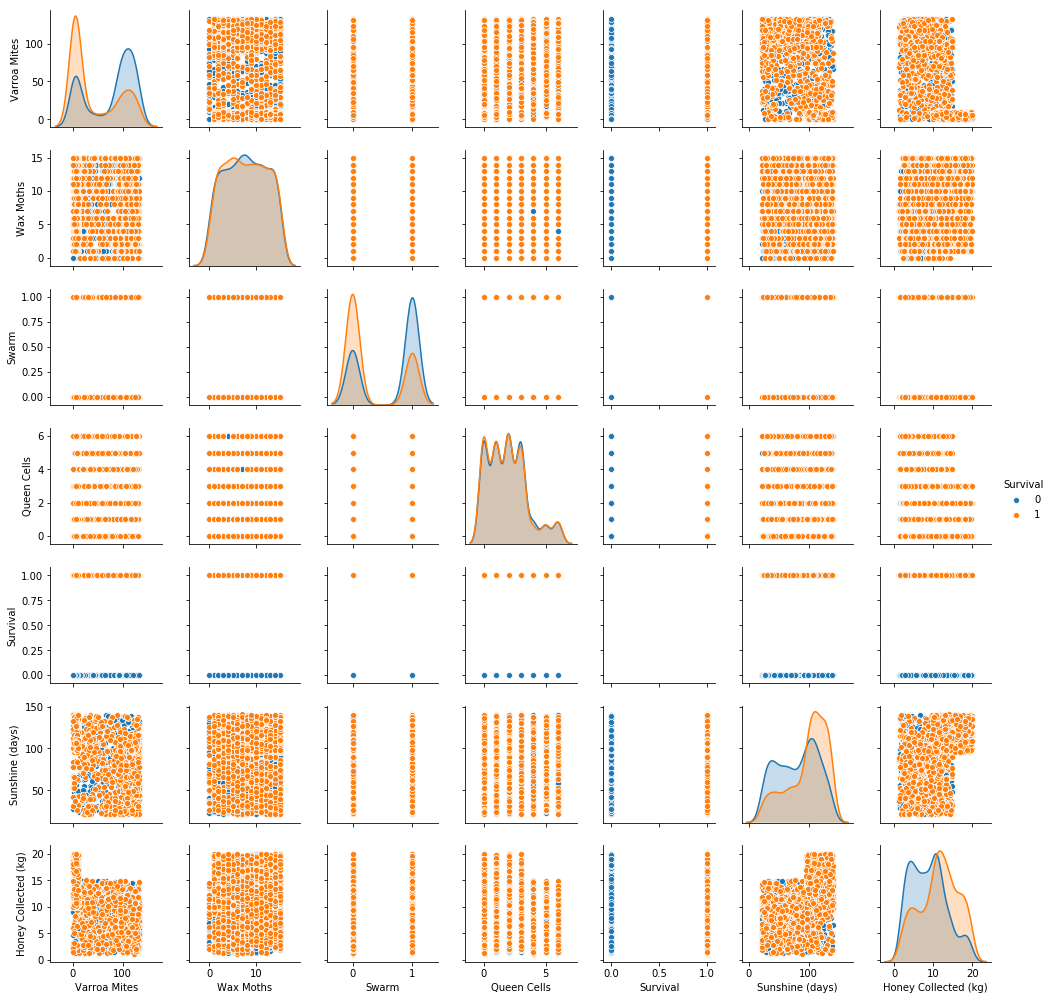

In [11]:
### data visualization with pair plot
sns.pairplot(fabap_df, hue='Survival', height=2.0)

In [12]:
### I can see no one variable has a distinct correlation to survival

# Standardizing the Data


In [13]:
### Check the variance of the data
print(fabap_df.var())

Varroa Mites            2558.808297
Wax Moths                 19.031700
Swarm                      0.250065
Queen Cells                2.580864
Survival                   0.249900
Sunshine (days)         1155.865756
Honey Collected (kg)      23.790892
dtype: float64


In [14]:
### Apply the log normalization function to the Varroa Mites and Sunshine (days) columns
fabap_df['Varroa_log'] = np.log(fabap_df['Varroa Mites'])
fabap_df['Sunny_log'] = np.log(fabap_df['Sunshine (days)'])


### Check the variance of the columns again
print(fabap_df['Sunny_log'].var())
print(fabap_df['Varroa_log'].var())


0.23501179305797948
2.669995615056271


In [15]:
# the data needs to be scaled: try Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Var_subset = fabap_df[["Varroa Mites"]]
Varroa_scaled = pd.DataFrame(scaler.fit_transform(Var_subset))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
# Check the variance of the data
print(fabap_df.var())
print(fabap_df.shape)

Varroa Mites            2558.808297
Wax Moths                 19.031700
Swarm                      0.250065
Queen Cells                2.580864
Survival                   0.249900
Sunshine (days)         1155.865756
Honey Collected (kg)      23.790892
Varroa_log                 2.669996
Sunny_log                  0.235012
dtype: float64
(2891, 9)


In [17]:
# create a scaled DataFrame to compare accuracy scores from original to normalized
fabap_norm = fabap_df.take([1,2,3,4,6,7,8], axis=1)
fabap_norm.head()

,Wax Moths,Swarm,Queen Cells,Survival,Honey Collected (kg),Varroa_log,Sunny_log
0,10,1,5,1,3.907,3.912023,4.509485
1,9,1,3,0,18.235,0.000000,4.638363
2,8,1,0,0,6.908,4.828314,4.566083
3,14,1,2,0,8.398,4.574711,3.784190
4,15,1,2,0,6.900,4.779123,3.256493


In [18]:
# confirm variance of the normalized data
print(fabap_norm.var())

Wax Moths               19.031700
Swarm                    0.250065
Queen Cells              2.580864
Survival                 0.249900
Honey Collected (kg)    23.790892
Varroa_log               2.669996
Sunny_log                0.235012
dtype: float64


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


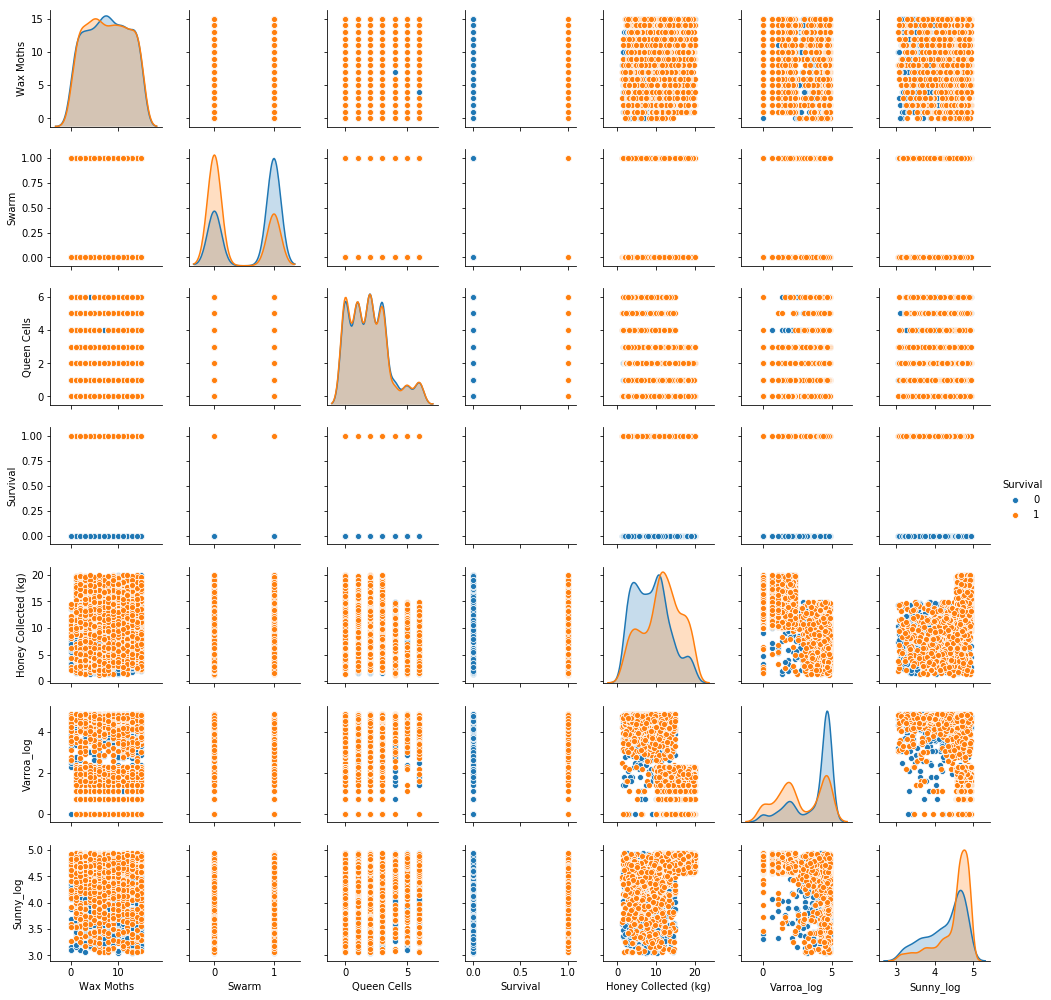

In [19]:
# data visualization with pair plot
sns.pairplot(fabap_norm, hue='Survival', height=2.0)

# Normalization of Data

In [20]:
# define X for scaling purposes
X = fabap_norm.drop(['Survival'], axis=1)

In [21]:
# the data needs to be scaled: try Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
# the data needs to be scaled: Try MinMaxScaler as well 
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

X_mM = pd.DataFrame(scale.fit_transform(X))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [23]:
print(X_scaled.describe())

                  0             1             2             3             4  \
count  2.891000e+03  2.891000e+03  2.891000e+03  2.891000e+03  2.891000e+03   
mean   1.000103e-16  3.253480e-16 -1.921673e-16 -8.837429e-17  5.877154e-16   
std    1.000173e+00  1.000173e+00  1.000173e+00  1.000173e+00  1.000173e+00   
min   -1.796604e+00 -9.907039e-01 -1.209835e+00 -1.829015e+00 -2.002149e+00   
25%   -8.795468e-01 -9.907039e-01 -5.872589e-01 -8.563375e-01 -8.110639e-01   
50%    3.751020e-02 -9.907039e-01  3.531737e-02  5.461811e-02  5.623241e-01   
75%    9.545672e-01  1.009383e+00  6.578937e-01  7.028986e-01  8.749987e-01   
max    1.642360e+00  1.009383e+00  2.525623e+00  2.018837e+00  9.912167e-01   

                  5  
count  2.891000e+03  
mean  -1.617158e-15  
std    1.000173e+00  
min   -2.768913e+00  
25%   -5.682090e-01  
50%    3.993849e-01  
75%    7.434377e-01  
max    1.132725e+00  


In [24]:
print(X_mM.describe())

                 0            1            2            3            4  \
count  2891.000000  2891.000000  2891.000000  2891.000000  2891.000000   
mean      0.522426     0.495330     0.323879     0.475334     0.668862   
std       0.290836     0.500065     0.267751     0.259930     0.334130   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.266667     0.000000     0.166667     0.252784     0.397908   
50%       0.533333     0.000000     0.333333     0.489528     0.856719   
75%       0.800000     1.000000     0.500000     0.658007     0.961175   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 5  
count  2891.000000  
mean      0.709680  
std       0.256347  
min       0.000000  
25%       0.564046  
50%       0.812043  
75%       0.900225  
max       1.000000  


In [25]:
surv = fabap_norm['Survival']
qncells = fabap_norm['Queen Cells']

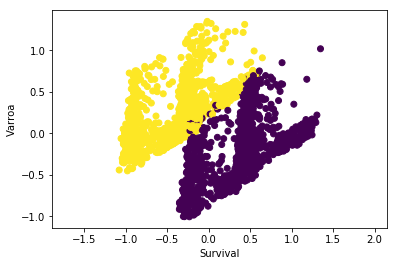

Pearson Correlation: 6.953591587654787e-17


In [26]:
### decorrelate the data with PCA 
# Import PCA
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to fabap_norm: pca_features
pca_features = model.fit_transform(fabap_norm)

# Assign survival column of pca_features: xs
xs = pca_features[:,4]  

# Assign varroa_log column of pca_features: ys
ys = pca_features[:,6]  

# Scatter plot xs vs ys
plt.scatter(xs, ys, c= surv)
plt.axis('equal')
plt.xlabel('Survival')
plt.ylabel('Varroa')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print("Pearson Correlation:", correlation)

### looks like PCA might be useful to tease out identity of the clusters although the correlation is virtually nonexistent

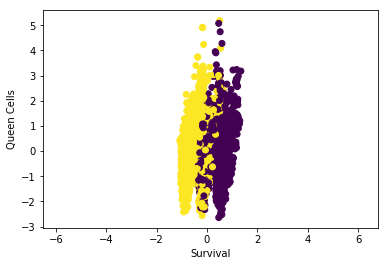

Pearson Correlation: -3.386935314354511e-16


In [27]:
### attempt visualizing tsne with other features
# Assign survival column of pca_features: xs
xs = pca_features[:,4]  

# Assign queen cells column of pca_features: ys
ys = pca_features[:,3]  

# Scatter plot xs vs ys
plt.scatter(xs, ys, c= surv)
plt.axis('equal')
plt.xlabel('Survival')
plt.ylabel('Queen Cells')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print("Pearson Correlation:", correlation)



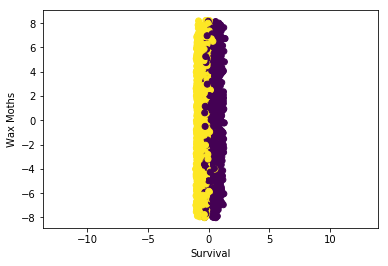

Pearson Correlation: 2.7190038119513315e-18


In [28]:
### attempt visualizing tsne with other features
# Assign survival column of pca_features: xs
xs = pca_features[:,4]  

# Assign wax moths column of pca_features: ys
ys = pca_features[:,1]  

# Scatter plot xs vs ys
plt.scatter(xs, ys, c= surv)
plt.axis('equal')
plt.xlabel('Survival')
plt.ylabel('Wax Moths')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print("Pearson Correlation:", correlation)



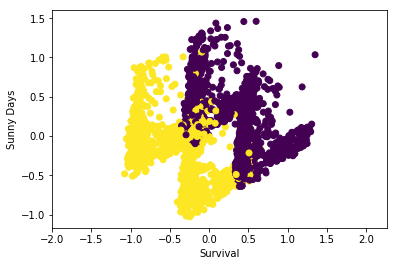

Pearson Correlation: -4.0365307893581106e-17


In [29]:
### attempt visualizing tsne with other features
# Assign survival column of pca_features: xs
xs = pca_features[:,4]  

# Assign queen cells column of pca_features: ys
ys = pca_features[:,5]  

# Scatter plot xs vs ys
plt.scatter(xs, ys, c= surv)
plt.axis('equal')
plt.xlabel('Survival')
plt.ylabel('Sunny Days')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print("Pearson Correlation:", correlation)



/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


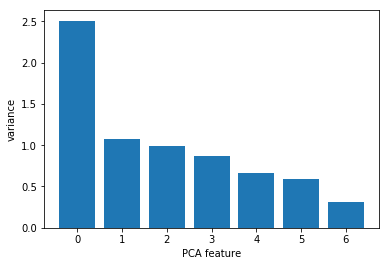

In [30]:
### Necessary imports for scaling and expoloring the variance of PCA features
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(fabap_norm)

features= range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### It looks like the data has a skewed intrinsic dimensionality toward 1, however only 2-3 times as much as the other features

In [31]:
### reduce the dimension of the data to one for visualization 
pca1 = PCA(n_components=4)
pca.fit(fabap_norm)
pca_features = pca.transform(fabap_norm)
print(pca_features.shape)
pca_features

(2891, 7)


array([[-6.08328104, -2.83336513,  2.71671553, ..., -0.11015329,
        -0.67353985,  0.3933118 ],
       [ 8.59701993, -0.21481002,  1.44214843, ...,  1.278696  ,
         0.09926003,  0.16284525],
       [-3.38445982, -0.55437118, -2.10299534, ...,  0.35520559,
        -0.34915159, -0.3028221 ],
       ...,
       [ 5.37086846,  0.40421208, -1.74267851, ...,  0.50221681,
         0.4969825 , -0.4608848 ],
       [ 6.31716893, -5.52439286, -1.66291427, ...,  1.04143924,
        -0.19131989, -0.12703386],
       [ 0.97579302,  0.93807468,  0.97753425, ...,  1.24322074,
         0.08047109,  0.16926892]])

In [32]:
pa1 = pca_features[:,0]
pa1.shape

(2891,)

In [33]:
pca_feature = pd.Series(pa1)
pca_feature

0       -6.083281
1        8.597020
2       -3.384460
3       -1.365440
4       -2.767953
5        6.451351
6       -4.262065
7       -0.959810
8        4.833549
9        3.282496
10      -7.874885
11       8.875802
12       4.478781
13       7.219669
14       4.108658
15       0.864841
16       2.686651
17      -5.730550
18      -3.418844
19       9.683477
20      -1.257805
21       2.871141
22      -2.066398
23       7.720634
24       9.620063
25       1.532876
26       7.398890
27       6.065406
28      10.369837
29       5.249068
          ...    
2861    -6.195237
2862    -4.285749
2863     7.784850
2864    -0.136995
2865    -7.268159
2866    -0.911208
2867     1.868804
2868    -2.991369
2869     8.660275
2870    -1.950882
2871     3.060283
2872     1.678701
2873    -2.500948
2874    -7.748721
2875     3.547391
2876    -0.077644
2877    -6.782625
2878     9.303163
2879     1.178334
2880    -1.602302
2881     2.676441
2882    -5.815452
2883     7.582534
2884    -8.373616
2885    -5

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


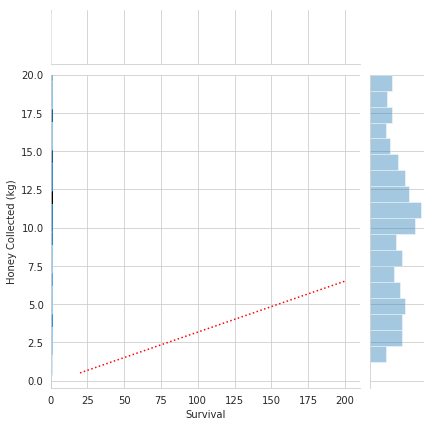

In [34]:
### explore whether there is a correlation of honey collected with survival
with sns.axes_style('whitegrid'):
    b = sns.jointplot('Survival', 'Honey Collected (kg)', fabap_norm, kind='hex')
    b.ax_joint.plot(np.linspace(20,200),
                    np.linspace(0.5, 6.5), ':y', c='red')

[t-SNE] Computing 115 nearest neighbors...
[t-SNE] Indexed 2891 samples in 0.001s...
[t-SNE] Computed neighbors for 2891 samples in 0.075s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2891
[t-SNE] Computed conditional probabilities for sample 2000 / 2891
[t-SNE] Computed conditional probabilities for sample 2891 / 2891
[t-SNE] Mean sigma: 1.171493
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.799423
[t-SNE] KL divergence after 500 iterations: 0.843075


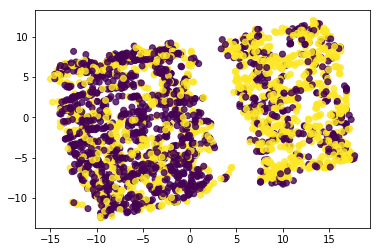

In [35]:
# Import TSNE (T-distributed Stochastic Neighbor Embedding)
from sklearn.manifold import TSNE

# Create a TSNE instance: model
mtsne = TSNE(n_components=3, verbose=1, perplexity=38, n_iter=500, learning_rate=400, random_state=1)

# Apply fit_transform to fabap_norm: tsne_features
tsne_features = mtsne.fit_transform(fabap_norm)

# Select the 1st feature: xst
xst = tsne_features[:,0]

# Select the 3rd feature: yst
yst = tsne_features[:,2]

# Scatter plot, coloring by survival outcome
plt.scatter(xst, yst, c=surv, alpha=0.8)
plt.show()

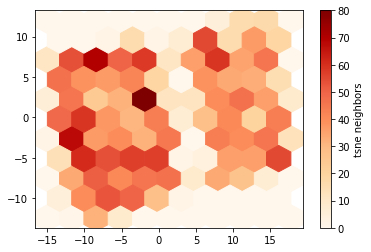

In [36]:
# view the above figure in a divergent colormap 
plt.hexbin(xst, yst, gridsize=10, cmap='OrRd')
cb = plt.colorbar(label = 'tsne neighbors')

# Classification
Deciding on the best classifier model:

1. K Nearest Neighbors Classifier
2. AdaBoost Classifier
3. Support Vector Machines (SVM) Classification
4. Random Forest Classifier
5. Logistic Regression 

In [37]:
### Import the sklearn Classifiers
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### 1.  K Nearest Neighbors

In [38]:
# Import Train/Test Split + Fit/Predict/Accuracy classification tools
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier()

In [39]:
### Training the model
# Create a data with all columns except 'Survival'
X = fabap_norm.drop('Survival', axis=1)

# Create a 'Survival' labels dataset
y = fabap_norm[['Survival']]

# Use stratified sampling to split up the dataset according to the y dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Print out the category_desc counts on the training y labels
print(y_train['Survival'].value_counts())
print('\n', y_train.head())

0    1114
1    1054
Name: Survival, dtype: int64

       Survival
804          1
638          0
960          0
1569         1
438          0


In [40]:
### Check classification KNN on the fit data from above
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(6)

knn.fit(X_train, np.ravel(y_train,order='C'))
y_pred= knn.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.665283540802213


In [41]:
# Split the dataset and labels into training and test sets based on X_mM (MinMaxScaled)
X_train, X_test, y_train, y_test = train_test_split(X_mM,y)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, np.ravel(y_train,order='C'))

# Score the model on the test data
print(knn.score(X_test, y_test))

0.6431535269709544


### 2. AdaBoost

In [42]:
### AdaBoostClassifier score
clf_ada = AdaBoostClassifier(n_estimators=100, random_state=42)
clf_ada.fit(X,y)

clf_ada.score(X,y)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6973365617433414

### 3. SVM

In [43]:
### Support Vector Machine score
from sklearn.metrics import accuracy_score
svc = SVC(gamma='auto')
clf_svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

clf_svc.score(X_test, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6708160442600276

### 4.  Random Forest

In [44]:
### Random Forrest score
rf = RandomForestClassifier(n_estimators=200)
clf_rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

clf_rf.score(X_test, y_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.6473029045643154

In [45]:
clf_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### 5. Logistic Regression

In [46]:
### Logistic Regression score
logreg = LogisticRegression()
clf_lr = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

clf_lr.score(X_test, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6804979253112033

## <p style="text-align: center;"> _I cannot conclude a "best" model from these scores._ </p>
## <p style="text-align: center;"> _The coincidence is too convenient_ </p>

# K means to inform Clustering

In [47]:
# Import KMeans
from sklearn.cluster import KMeans

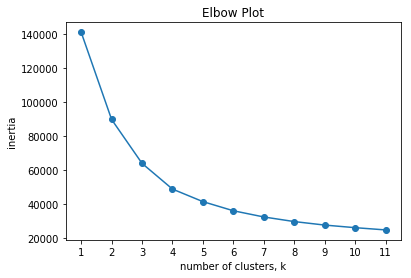

In [48]:
# Investigate the number of clusters that might be a good choice using KMeans to observe where the inertia decreases
# 5 may be about right

ks = range(1, 12)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(fabap_norm)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.title('Elbow Plot')
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
